# Regular Expressions and EDA

**Data 100 Spring 2021 Midterm Review Session**

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_xy():
    np.random.seed(100)
    x = np.random.uniform(0, 20, size=100)
    y = (x + np.random.uniform(0, 1, size=100)) ** (1/3) + np.random.uniform(-.05, .05, size=100)
    return x, y

## Regular Expressions

### Fall 2020 MT 5

HTTP is a response-reply internet protocol and is used by web-browsers to request content from servers to
display to the user. The first few lines of an HTTP request have the following format:

```
POST /fa20/syllabus HTTP/1.1
User-Agent: Mozilla/4.0 (compatible; MSIE5.01; Windows NT)
Host: ds100.org
```

The first line contains an HTTP "verb", usually `GET` or `POST`, the path on the host being requested (`/fa20/syllabus`
above), and the HTTP version being used to send the request. The lines below that are HTTP request headers
that define the required parameters so that the server can process the request. (There are typically more, but
we’ve omitted them since they’re not relevant to this problem.)

**(a)** In the string `extract_verb`, write a regular expression that extracts the HTTP verb from a
request. Assume that all HTTP
requests have "HTTP" in them.

In [13]:
extract_verb = r"([A-Z]+)\s+[/\w]*\s+HTTP/[\d.]+"

In [14]:
request_1 = """POST /fa20/syllabus HTTP/1.1
User-Agent: Mozilla/4.0 (compatible; MSIE5.01; Windows NT)
Host: ds100.org"""

re.findall(extract_verb, request_1)#[0]

['POST']

In [15]:
request_2 = """GET /su19/syllabus HTTP/1.1
User-Agent: Safari/13.1 (Macintosh; Intel Mac OS X 10_10)
Host: data8.org"""

re.findall(extract_verb, request_2)[0]

'GET'

In [16]:
request_3 = """GARBAGE /useless HTTP/1.1
User-Agent: Garbage/0.0 (garbage)
Host: garbage.ca"""

re.findall(extract_verb, request_3)[0]

'GARBAGE'

### Summer 2020 MT 1 6a

**(i)** We work for a company called R Us that has many stores, but they all end with 'R Us' (eg.
Toys R Us, Babies R Us, etc). Any store specific coupon can be used at any R Us store. Assume no
store not owned by R Us ends with 'R Us'. Complete the Python function below that takes in a name
and returns True if the store name is owned by the parent company and False if not.

In [22]:
names = ['Toys R Us', 'Babies R Us', 'Bagels R Us', 'We R Us', 'We R Usa', 
         'R Ussia', 'R UsR Us']

def is_correct_company(name):
    pattern = r'R Us$'
    return len(re.findall(pattern, name)) > 0

[is_correct_company(name) for name in names]

[True, True, True, True, False, False, True]

**(ii)** We want to use the same scanner to scan both coupons and R Us (the company we work for)
rewards member cards. Rewards member cards are interesting in that they have a bunch of characters,
but the only ones the scanner cares about (the actual member id) are the ones between two 'r's. The
member id must not contain an 'r'.

In [25]:
members = ['kfhraf9whrv', 'rhahahararhahahahar', 'kansas', 'realmember1andrealmember2', 
           'decorumplease', 'kfhrarhellorwhrv']

pattern = r'r([^r]*)r'
for member in members:
    print(re.findall(pattern, member))

['af9wh']
['hahaha', 'hahahaha']
[]
['ealmembe', 'ealmembe']
[]
['a', 'wh']


### Spring 2020 Checkpoint 16

Suppose the TAs want to award partial credit to students who placed a Kleene closure after
a `\d`. A Kleene closure defines how many occurrences of something must be matched; see
the code below for examples of Kleene closures. Which of the following regular expressions
would work such that the following Python expression outputs correctly?

In [28]:
answers = [r"ˆ\d{16}$", r"\d{14}|\d", r"\d+", r"[3]\d*", r"\d", r"\d\w\dd+"]

pattern = r"\\d[{+*]"
[bool(re.findall(pattern, answers[i])) for i in range(len(answers))]

[True, True, True, True, False, False]

### Spring 2019 MT 1 3

Which of the strings in `strings` match the regex `pattern`?

In [29]:
strings = ["bar_chart", "group_by_x", "a_box_plot", "visualize_first"]
pattern = r"[a-z]+_[a-z]{2}[_r]_?[a-z]+"

[bool(re.match(pattern, s)) for s in strings]

[False, True, False, True]

## EDA

### Fall 2019 MT 1 4a


What kinds of transformations could help make the relationship in the plot below linear?

* $\log y$
* $\log x$
* $e^x$
* $y^3$
* None of the above

_Note:_ The plot is similar to, but not the same, as in the exam.

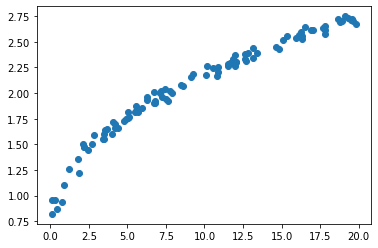

In [32]:
x, y = get_xy()
plt.scatter(x, y);

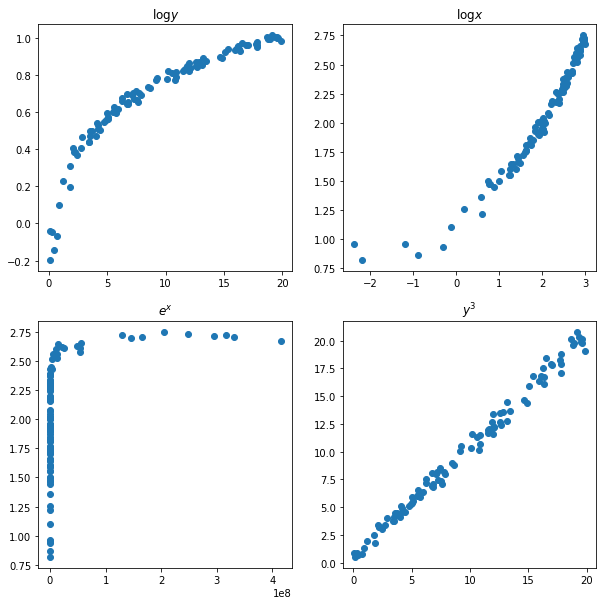

In [36]:
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.scatter(x, np.log(y))
plt.title(r"$\log y$")
plt.subplot(222)
plt.scatter(np.log(x), y)
plt.title(r"$\log x$")
plt.subplot(223)
plt.scatter(np.exp(x), y)
plt.title(r"$e^x$")
plt.subplot(224)
plt.scatter(x, y**3)
plt.title(r"$y^3$");

### Spring 2017 MT 4

Which of the following are reliable ways to assess the granularity of a table? Select all that apply.

* Build histograms on each column
* Identify a primary key
* Compare the number of rows in the table with the number of distinct values in subsets of the columns
* Address outliers via trimming or winsorizing
* All of the above
* None of the above

### Fall 2017 MT 8

Consider the following data file:

```
"business_id","name","address","phone"
10,"TIRAMISU KITCHEN","033 BELDEN PL","+14154217044"
19,"LIFESTYLE CAFE","1200 VAN NESS AVE","+14157763262"
24,"OMNI S.F. HOTEL"," ","9999999999999999"
42,"The "Best", Food!","500 CALIFORNIA ST","+14156211114"
43,"The "Best", Food!","3716 Cesar Chavez","+14156211114"
```

**(1)** Which of the following best describes the format of this file?

* Raw Text
* Tab Separated Values
* Comma Separated Values
* JSON

**(2)** Which of the following best describes the granularity of each record?

* Restaurant Chains
* Individual Restaurant Locations
* Strings
* Daily

**(3)** Select all the true statements.

* From the available data the business id appears to be a primary key.
* There appear to be no missing values
* While the data appears to be quoted there may be issues with the quote character.
* There are nested records.
* None of the above statements is true.